In [5]:
!pip install tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=148b2277f8930f2dc03d1b20101fdd1d15839ae5fbd2fcc0f14e1c56cd795418
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled whee

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.4.1


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.shape

(284807, 31)

In [12]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
### Balance Dataset 

In [16]:
non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [17]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [18]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [20]:
data = fraud.append(non_fraud, ignore_index = True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,151209.0,-0.635954,1.595052,-1.008609,-0.695791,0.837636,-0.457624,0.704400,0.135747,-0.050234,...,0.397514,1.289357,-0.090662,0.244719,-0.610883,-0.240060,0.224591,0.317942,1.00,0
980,83805.0,-1.109635,1.498097,1.017411,1.749977,-1.533103,1.780083,-2.071106,-5.614922,0.399299,...,1.694040,-0.461677,0.307974,0.384896,0.856654,-0.065800,0.389216,0.236512,107.94,0
981,37299.0,1.115149,0.391219,0.797412,2.253420,-0.014756,0.560921,-0.293748,0.295682,-0.736387,...,-0.047249,-0.207472,0.059894,-0.348871,0.220998,-0.095238,0.013237,0.011774,0.77,0
982,144562.0,1.849120,-0.526383,-1.004135,0.248898,-0.307316,-0.509099,-0.152952,0.051331,0.902509,...,-0.386637,-1.354918,0.398069,-0.605202,-0.584483,-0.857316,-0.023563,-0.041862,81.82,0


In [21]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [22]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [24]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [25]:
y_train.shape, y_test.shape

((787,), (197,))

In [26]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,70331.0,1.142967,-0.174855,0.831036,0.057814,-0.933437,-0.712223,-0.341734,0.004934,0.115368,...,0.005824,-0.110091,-0.441751,0.140196,0.567946,-0.061237,0.755503,-0.072194,0.012122,37.08
898,152159.0,2.120847,-0.660270,-1.078240,-0.539913,-0.861313,-1.078447,-0.837032,-0.198448,0.006151,...,0.080827,0.246802,0.802664,0.081801,-0.110646,-0.132385,-0.088687,0.029489,-0.009057,29.95
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,126316.0,1.989536,-0.175191,-0.940170,-0.001379,-0.027396,-0.588241,-0.039525,-0.142033,0.190247,...,-0.069771,-0.413572,-1.258468,0.449895,-0.521062,-0.671683,0.025232,-0.071827,-0.056817,30.10
739,65868.0,1.207099,-0.300112,-0.311003,0.164989,1.543265,4.058650,-1.140805,1.090853,0.761328,...,-0.009647,-0.115422,-0.279335,-0.040503,1.001063,0.573693,-0.393611,0.074648,0.031567,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,28733.0,-0.787145,-0.178730,1.308000,-1.538985,-0.066880,-1.681284,0.231388,-0.198419,-1.349618,...,0.396970,0.373464,0.893960,0.012720,0.753408,-0.051452,-0.346054,0.330367,0.219168,40.90
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,163672.0,1.988322,-0.395055,-0.325126,0.353749,-0.852548,-0.805087,-0.586413,0.028916,1.613095,...,-0.375609,-0.134761,-0.333335,0.383462,-0.124883,-0.446917,-0.914577,0.050107,-0.031582,1.00


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[-0.3470359 ,  0.62822314, -0.53253731, ..., -0.15529707,
        -0.05989842, -0.25348098],
       [ 1.33591611,  0.79919482, -0.66065543, ..., -0.05926367,
        -0.10673389, -0.28253155],
       [-1.4151185 , -2.10230849,  1.23003351, ...,  2.46908291,
        -2.28240205, -0.4004858 ],
       ...,
       [-1.54477253, -0.3982007 ,  0.31715618, ..., -1.34490206,
         1.47384752, -0.2807388 ],
       [ 1.57270335,  0.77602411, -0.59065582, ..., -0.0397911 ,
        -0.15654539, -0.4004858 ],
       [ 1.01579161,  0.20093102, -0.76413807, ..., -0.28936188,
        -0.27140162,  0.20660173]])

In [29]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [30]:
X_train.shape

(787, 30)

In [31]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [33]:
### Build CNN

In [34]:
epochs = 20

model = Sequential()
model.add(Conv1D(32, 2, activation = 'relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(64, 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation = 'sigmoid'))


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [40]:
model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20
25/25 [==============================] - 4s 49ms/step - loss: 1.0288 - accuracy: 0.5829 - val_loss: 0.6099 - val_accuracy: 0.7766
Epoch 2/20
25/25 [==============================] - 0s 14ms/step - loss: 0.5833 - accuracy: 0.7576 - val_loss: 0.5698 - val_accuracy: 0.7868
Epoch 3/20
25/25 [==============================] - 0s 14ms/step - loss: 0.4533 - accuracy: 0.8327 - val_loss: 0.5400 - val_accuracy: 0.8426
Epoch 4/20
25/25 [==============================] - 0s 14ms/step - loss: 0.3720 - accuracy: 0.8485 - val_loss: 0.5087 - val_accuracy: 0.8883
Epoch 5/20
25/25 [==============================] - 0s 14ms/step - loss: 0.3032 - accuracy: 0.8910 - val_loss: 0.4776 - val_accuracy: 0.9036
Epoch 6/20
25/25 [==============================] - 0s 14ms/step - loss: 0.3392 - accuracy: 0.8824 - val_loss: 0.4442 - val_accuracy: 0.9036
Epoch 7/20
25/25 [==============================] - 0s 13ms/step - loss: 0.3315 - accuracy: 0.8776 - val_loss: 0.4112 - val_accuracy: 0.9137
Epoch 8/20
25

In [44]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()


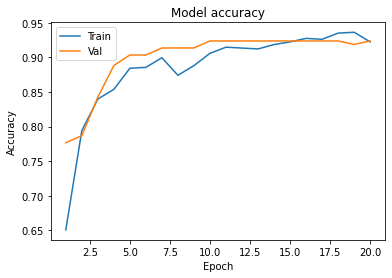

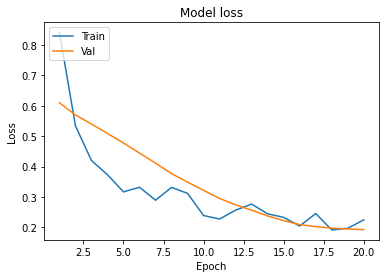

In [45]:
plot_learningCurve(history, epochs)

In [ ]:
### Adding Maxpool

In [48]:
epochs = 50

model = Sequential()
model.add(Conv1D(32, 2, activation = 'relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))


model.add(Conv1D(64, 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose = 1)


Epoch 1/50
25/25 [==============================] - 3s 18ms/step - loss: 1.3171 - accuracy: 0.4897 - val_loss: 0.6453 - val_accuracy: 0.6396
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.9470 - accuracy: 0.6287 - val_loss: 0.6248 - val_accuracy: 0.7462
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.8484 - accuracy: 0.6454 - val_loss: 0.6025 - val_accuracy: 0.7766
Epoch 4/50
25/25 [==============================] - 0s 14ms/step - loss: 0.6661 - accuracy: 0.7099 - val_loss: 0.5757 - val_accuracy: 0.8071
Epoch 5/50
25/25 [==============================] - 0s 13ms/step - loss: 0.6350 - accuracy: 0.7577 - val_loss: 0.5463 - val_accuracy: 0.8325
Epoch 6/50
25/25 [==============================] - 0s 13ms/step - loss: 0.5604 - accuracy: 0.7685 - val_loss: 0.5133 - val_accuracy: 0.8376
Epoch 7/50
25/25 [==============================] - 0s 14ms/step - loss: 0.5136 - accuracy: 0.7994 - val_loss: 0.4807 - val_accuracy: 0.8376
Epoch 8/50
25/

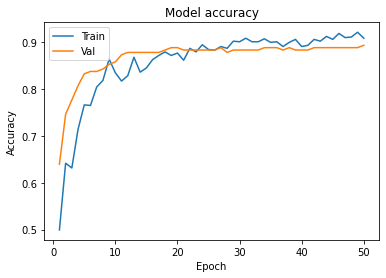

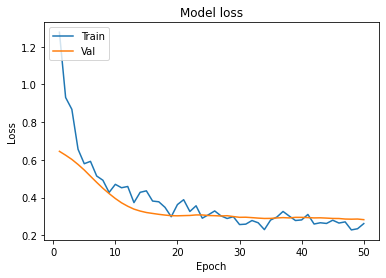

In [49]:
plot_learningCurve(history, epochs)